<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [95]:
import pandas as pd
import seaborn as sns

Load the dataset into a dataframe.


In [96]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

KeyboardInterrupt: 

In [ ]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


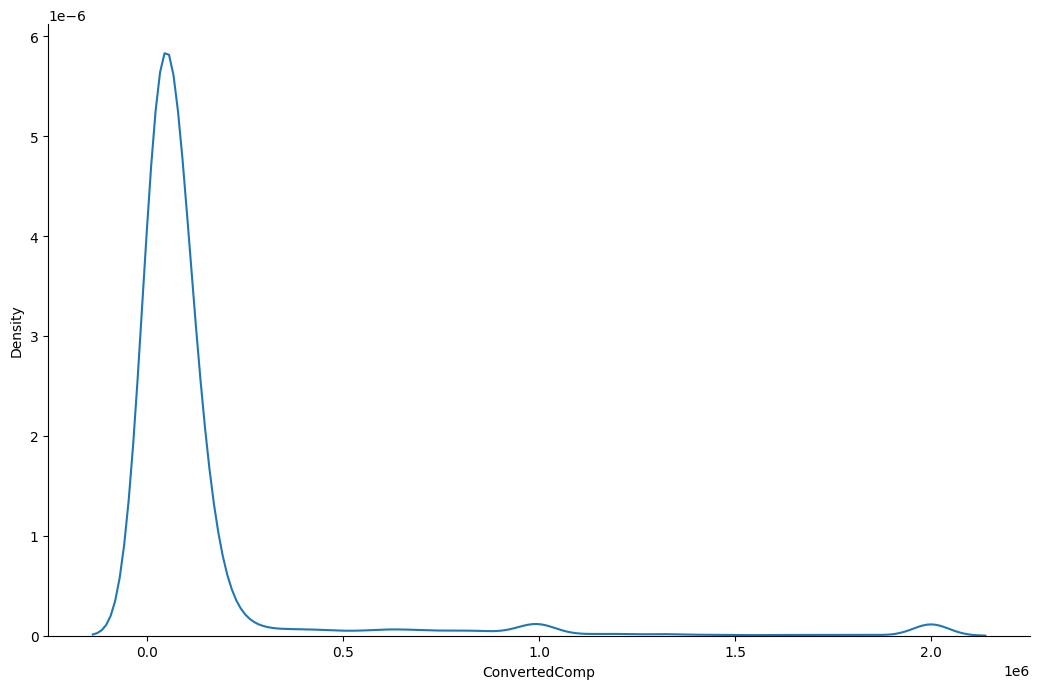

In [ ]:
# your code goes here
sns.displot(df['ConvertedComp'], kind="kde", height=7, aspect = 1.5)

Plot the histogram for the column `ConvertedComp`.


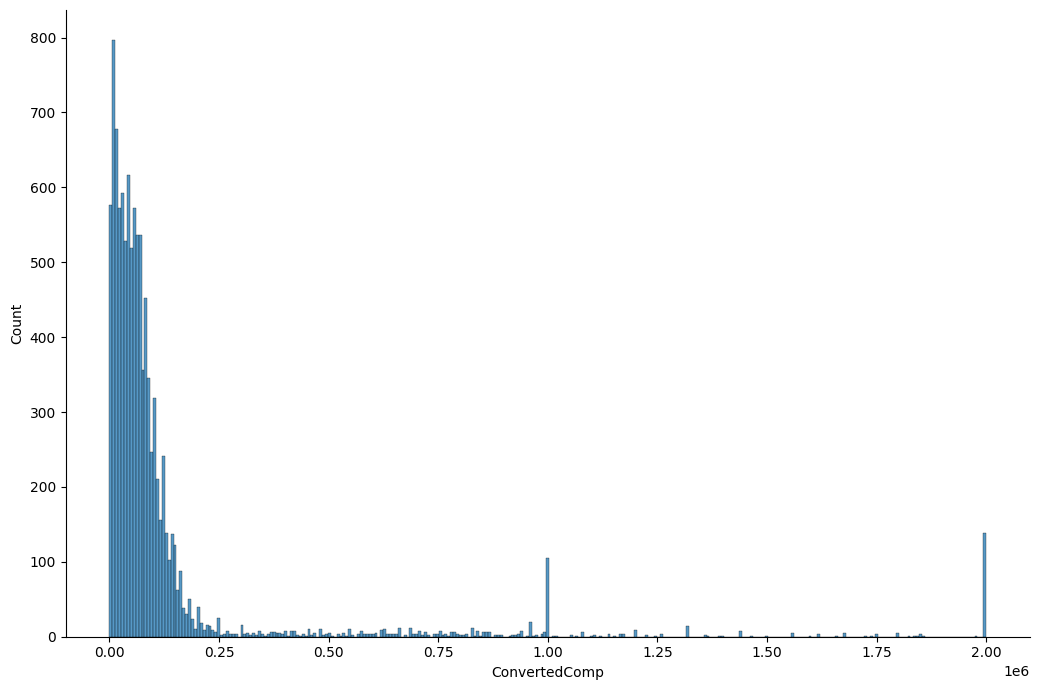

In [ ]:
# your code goes here
sns.displot(df['ConvertedComp'], kind="hist", height=7, aspect=1.5)

What is the median of the column `ConvertedComp`?


In [ ]:
# your code goes here
df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here
df['Gender'].value_counts()['Man']


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# your code goes here
woman_df = df[df['Gender'] == 'Woman']
median_converted_comp_woman = woman_df['ConvertedComp'].median()
median_converted_comp_woman

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [ ]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


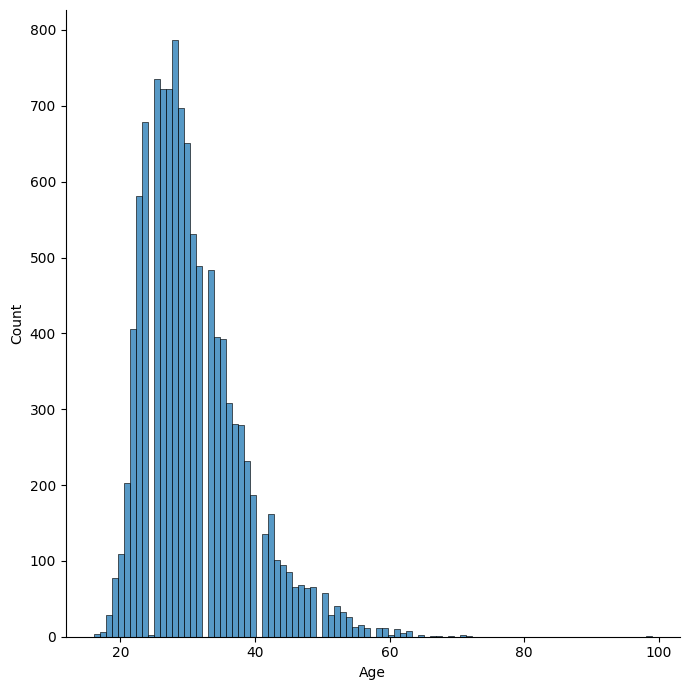

In [ ]:
# your code goes here
sns.displot(df['Age'], kind="hist", height=7, aspect=1.0)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: xlabel='ConvertedComp'>

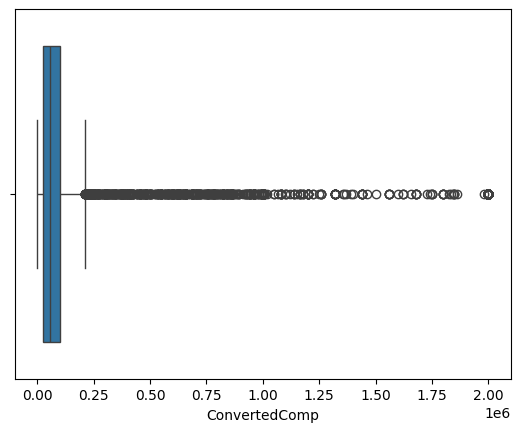

In [139]:
# your code goes here
sns.boxplot(data=df['ConvertedComp'], orient = 'h')


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [117]:
# your code goes here
import numpy as np
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range for ConvertedComp is:", IQR)


Inter Quartile Range for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [118]:
upper_bound = Q3 + IQR*1.5
lower_bound = Q1 + IQR*1.5
print("Upper bound is",upper_bound)
print("Lower bound is",lower_bound)


Upper bound is 209698.0
Lower bound is 136566.0


Identify how many outliers are there in the `ConvertedComp` column.


In [119]:
# your code goes here
num_outliers = 0

for i in df['ConvertedComp']:
    if (i < lower_bound) or (i > upper_bound):
        num_outliers = num_outliers + 1

num_outliers

9945

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [135]:
# your code goes here

df_no_outliers = df[(df['ConvertedComp'] > lower_bound) & (df['ConvertedComp'] < upper_bound)]

# Display the shape of the new DataFrame
print("Shape of DataFrame without outliers:", df_no_outliers.describe())



Shape of DataFrame without outliers:          Respondent     CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
count    637.000000  6.370000e+02     637.000000   637.000000  588.000000   
mean   13028.648352  2.357909e+05  160621.042386    43.146782    4.787415   
std     7129.814911  1.029122e+06   18477.662548     7.422453    3.681397   
min       39.000000  2.880000e+03  136630.000000     6.000000    0.000000   
25%     7063.000000  1.450000e+05  145500.000000    40.000000    2.000000   
50%    13679.000000  1.550000e+05  155000.000000    40.000000    4.000000   
75%    19123.000000  1.750000e+05  173000.000000    45.000000    5.000000   
max    25038.000000  2.000000e+07  209356.000000    80.000000   50.000000   

              Age  
count  621.000000  
mean    35.711755  
std      8.381374  
min     17.000000  
25%     29.000000  
50%     35.000000  
75%     41.000000  
max     71.000000  


In [136]:
df_no_outliers['ConvertedComp'].describe()

count       637.000000
mean     160621.042386
std       18477.662548
min      136630.000000
25%      145500.000000
50%      155000.000000
75%      173000.000000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [137]:
numeric_columns = df.select_dtypes(include=['number'])
correlation = numeric_columns.corr()['Age']
print(correlation)



Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
